In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

In [2]:
cameras_file = os.path.join("../Desktop/Archive", "red-light-camera-locations.csv")
speedings_file = os.path.join("../Desktop/Archive","speed-camera-violations.csv")

In [3]:
red_locs_df = pd.read_csv(cameras_file)
del red_locs_df["Third Approach"]
speedings_df = pd.read_csv(speedings_file)

In [4]:
cams_per_ward = pd.DataFrame(red_locs_df.groupby("Wards")["Intersection"].count())
cams_per_ward.head()

,Intersection
Wards,
1,2
2,2
3,2
4,1
5,1


In [5]:
violations_per_ward = pd.DataFrame(speedings_df.groupby("Wards")["Violations"].sum())
violations_per_ward.head()

,Violations
Wards,
1.0,133599
2.0,80740
3.0,76211
4.0,332224
6.0,24005


In [6]:
merge_df = pd.merge(cams_per_ward, violations_per_ward, on="Wards")
merge_df = merge_df.rename(columns={
    "Intersection": "Number of Red Light Cams per Ward",
    "Violations": "Number of Speeding Violations per Ward"
})
merge_df.head()

,Number of Red Light Cams per Ward,Number of Speeding Violations per Ward
Wards,,
1,2,133599
2,2,80740
3,2,76211
4,1,332224
6,1,24005


In [7]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    print(f"pvalue: {round(pvalue,2)}")
    return line_eq

In [8]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

In [9]:
clean_df = merge_df.copy()

In [10]:
wards = [1,2,3,4,6,7,8,10,11,13,14,15,16,17,18,19,20,21,22,23,24,26,27,29,30,31,32,33,35,36,38,40,41,44,45,46,48,49,50] 

In [11]:
clean_df["Ward Number"] = wards

In [12]:
clean_df.head()
cameras_file = os.path.join("../Desktop/Archive", "ward_offices_locs_alt.csv")
ward_offices_df = pd.read_csv(cameras_file)
clean_df = pd.merge(clean_df, ward_offices_df, on="Ward Number")
clean_df.head()

,Number of Red Light Cams per Ward,Number of Speeding Violations per Ward,Ward Number,Latitude,Longitude,Neighborhoods,Navigator
0,2,133599,1,41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side"
1,2,80740,2,41.908759,-87.668029,"Near North Side, Lincoln Park, Wicker Park, Uk...","N Side, W and Near W Side"
2,2,76211,3,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side
3,1,332224,4,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
4,1,24005,6,41.752748,-87.606916,"Chatham, Chesterfield, Englewood, Greater Gran...",S Side and Far S Side


In [13]:
clean_df.columns

Index(['Number of Red Light Cams per Ward',
       'Number of Speeding Violations per Ward', 'Ward Number', 'Latitude',
       'Longitude', 'Neighborhoods', 'Navigator'],
      dtype='object')

correlation coefficient : 0.18
pvalue: 0.28


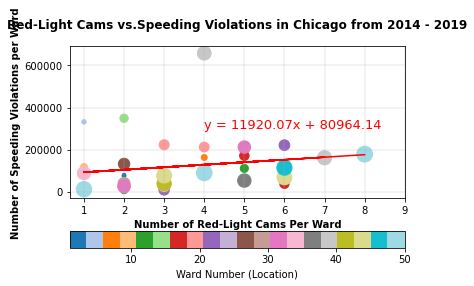

In [14]:
weight= clean_df["Ward Number"]*5
arrangement = clean_df["Ward Number"]
np.arange(len(clean_df["Ward Number"]))
cmap='tab20' 
line = to_linear_regress(clean_df["Number of Red Light Cams per Ward"], clean_df["Number of Speeding Violations per Ward"], weight, arrangement, cmap)
to_annotate(line, 4, 300000)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of Red-Light Cams Per Ward", fontweight="bold")
plt.ylabel("Number of Speeding Violations per Ward", labelpad=3.5, fontweight="bold") 
plt.title("Red-Light Cams vs.Speeding Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Ward Number (Location)", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (7,7 )
plt.grid(linewidth=0.3)
plt.savefig("Images/right_cams_vs_violations.png")

correlation coefficient : -0.02
pvalue: 0.92


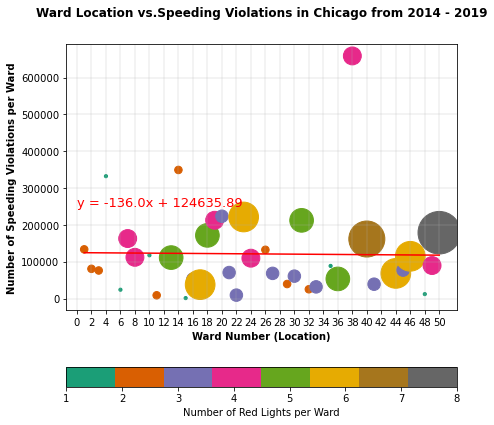

In [15]:
weight= 10 * (clean_df["Number of Red Light Cams per Ward"]**2.5)
arrangement = clean_df["Number of Red Light Cams per Ward"]
cmap='Dark2'
line = to_linear_regress(clean_df["Ward Number"], clean_df["Number of Speeding Violations per Ward"], weight, arrangement, cmap)
to_annotate(line, 0, 250000)
plt.xticks(np.arange(0, 51, 2))
plt.xlabel("Ward Number (Location)", fontweight="bold")
plt.ylabel("Number of Speeding Violations per Ward", fontweight="bold")
plt.title("Ward Location vs.Speeding Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Number of Red Lights per Ward", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (10,10)
plt.grid(linewidth=0.3)
plt.savefig("Images/location_vs._violations.png")

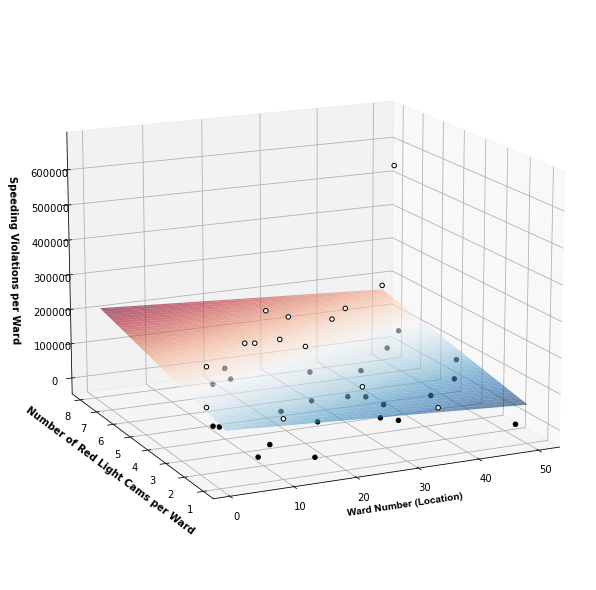

In [16]:
X = clean_df[["Ward Number", "Number of Red Light Cams per Ward"]]
y = clean_df["Number of Speeding Violations per Ward"]

## fit a OLS model with intercept on Ward Number and Number of Red Light Cams
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
xx1, xx2 = np.meshgrid(np.linspace(X["Ward Number"].min(), X["Ward Number"].max(), 100),
np.linspace(X["Number of Red Light Cams per Ward"].min(), X["Number of Red Light Cams per Ward"].max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0]["Ward Number"], X[resid >= 0]["Number of Red Light Cams per Ward"], y[resid >= 0], color='black', alpha=1.0, facecolor="white")
ax.scatter(X[resid < 0]["Ward Number"], X[resid < 0]["Number of Red Light Cams per Ward"], y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('Ward Number (Location)',fontweight="bold", fontname="Arial")
ax.set_ylabel('Number of Red Light Cams per Ward',fontweight="bold")
ax.set_zlabel('Speeding Violations per Ward', fontweight="bold",labelpad=15)
fig.savefig('Images/ax2_figure_expanded.png')

In [19]:
clean_df.sort_values(by="Number of Red Light Cams per Ward", ascending=False).reset_index(drop=True)

,Number of Red Light Cams per Ward,Number of Speeding Violations per Ward,Ward Number,Latitude,Longitude,Neighborhoods,Navigator
0,8,178772,50,41.998445,-87.703388,"West Ridge, West Roger's Park",Far N. Side
1,7,161633,40,41.985173,-87.689067,"Lincoln Square, Edgewater, West Ridge",Far N. Side
2,6,37771,17,41.752220,87.657918,"Marquette Park, Gresham, West Englewood, Chica...",SW Side
3,6,114740,46,41.965654,-87.656924,"Buena Park, Lakeview, Uptown","Far N. Side, N. Side"
4,6,68334,44,41.941873,-87.653429,Lakeview,N Side
5,6,221455,23,41.794699,-87.775670,"West Elsdon, West Lawn, Garfield Ridge and Cle...",Far W Side and SW Side
6,5,111217,13,41.776442,-87.722318,"West Lawn, Clearing, West Elsdon, Garfield Ridge",SW Side
7,5,171539,18,41.741901,-87.721094,"Southwest Side, Ashburn, Marquette Park, Aubur...",SW and Far SW
8,5,53345,36,41.932169,-87.799757,"Montclare, Portage Park, Belmont Cragin, Hermosa",NW Side
9,5,212307,31,41.932807,-87.742242,"Hermosa, Belmont-Cragin, Logan Square",NW Side


In [22]:
new_df = clean_df.sort_values(by="Number of Red Light Cams per Ward", ascending=False).reset_index(drop=True)
new_df = new_df[["Ward Number", "Number of Red Light Cams per Ward", "Number of Speeding Violations per Ward","Neighborhoods", "Navigator"]]
new_df = new_df.rename(columns={
    "Navigator": "Location"
})

In [33]:
new_new_df = clean_df.sort_values(by="Number of Speeding Violations per Ward", ascending=False).reset_index(drop=True)
new_new_df = new_new_df[["Ward Number", "Number of Speeding Violations per Ward", "Neighborhoods", "Navigator"]]
new_new_df

,Ward Number,Number of Speeding Violations per Ward,Neighborhoods,Navigator
0,38,658608,"Portage Park, Dunning",NW Side
1,14,349109,"Far West Side, Archer Heights, Garfield Ridge,...",SW Side
2,4,332224,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
3,20,223435,"Back of the Yards, Canaryville, Washington Par...",S and SW Side
4,23,221455,"West Elsdon, West Lawn, Garfield Ridge and Cle...",Far W Side and SW Side
5,19,212561,"Beverly, Mount Greenwood, Morgan Park, Washing...",Far SW Side
6,31,212307,"Hermosa, Belmont-Cragin, Logan Square",NW Side
7,50,178772,"West Ridge, West Roger's Park",Far N. Side
8,18,171539,"Southwest Side, Ashburn, Marquette Park, Aubur...",SW and Far SW
9,7,162942,"Calumet Heights, Pill Hill, South Chicago, Sou...",Far S Side
